In [1]:
import pandas as pd
from os.path import join
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

sns.set()
sns.set_context('talk')
%matplotlib inline

In [5]:
## SETTINGS
data_dir = '../../data/raw/temp_sensors/pre_experiment_final_calibration'
means = {}

In [6]:
def make_plots_and_means(dfs,experiment_times,site_str,means=None,room_temp=True):
    if means==None:
        means = {}
        
    means[site_str] = {}
    n_ex = len(experiment_times)

    pretty_metrics = ['Temperature','RH']

    for mi,metric in enumerate(['temp','rh']):
        means[site_str][metric] = {}
        means[site_str][metric]['individ'] = {}
        means[site_str][metric]['room'] = {}

        fig,ax = plt.subplots(n_ex,2,figsize = (12,n_ex*6))

        for ei,e in enumerate(experiment_times):
            for gi,g in enumerate(['control','treatment']):
                if len(experiment_times) > 1:
                    this_ax = ax[ei,gi]
                    first_ax = ax[0,0]
                    second_ax = ax[0,1]
                    last_ax = ax[n_ex-1,1]
                else:
                    this_ax = ax[gi]
                    first_ax = ax[0]
                    second_ax = ax[1]
                    last_ax = second_ax
                if ei == 0:
                    means[site_str][metric]['individ'][g] = []
                    means[site_str][metric]['room'][g] = []

                for si in range(6):
                    data = dfs[g][si].loc[e[0]:e[1]]

                    # for all individual sensors
                    metric_df = data.iloc[:,mi+1]
                    means[site_str][metric]['individ'][g].append(metric_df.mean())
                    metric_df.name = 'Sensor {}'.format(si+1)
                    metric_df.plot(ax=this_ax)

                # for main room sensor
                if room_temp:
                    data = dfs[g][6].loc[e[0]:e[1]]
                    metric_df = data.iloc[:,mi]
                    means[site_str][metric]['room'][g].append(metric_df.mean())
                    metric_df.name = 'Room Temp Sensor 1'
                    metric_df.plot(ax=this_ax,style='--')
                    
                    if metric == 'temp':
                        metric_df = dfs[g][7].loc[e[0]:e[1]]
                        means[site_str][metric]['room'][g].append(metric_df.mean())
                        metric_df.name = 'Room Temp Sensor 2'
                        metric_df.plot(ax=this_ax,style=':')

        first_ax.set_title('Control')
        second_ax.set_title('Treatment')
        last_ax.legend(loc='lower right')

        fig.suptitle('{} Pilot {} Measurements, {} Sessions'.format(
            site_str.title(),pretty_metrics[mi],n_ex),fontsize=18)
        fig.tight_layout()
        fig.subplots_adjust(top=.95)
        fig.savefig('../../results/figures/pilot/pilot_{}s_{}.png'.format(metric,site_str))

        for g in ['control','treatment']:
            means[site_str][metric]['individ'][g] = np.array(means[site_str][metric]['individ'][g]).mean()
            means[site_str][metric]['room'][g] = np.array(means[site_str][metric]['room'][g]).mean()

    return means


In [12]:
times = (pd.to_datetime('20170926T0741'),pd.to_datetime('20170926T1016'))

In [10]:
## Load DFs
df = pd.read_csv(join(data_dir,'20170926_Temp_W2.csv'),
                        skiprows=1,index_col = 1, parse_dates = True)

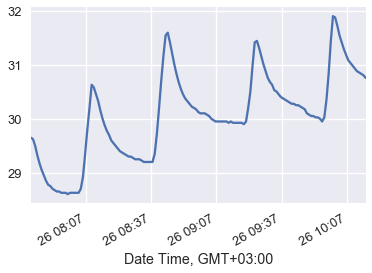

In [17]:
means = {}
data = df.loc[times[0]:times[1]]

# for all individual sensors
temp = data.iloc[:,1]
rh = data.iloc[:,2]
means['temp'] = temp.mean()
means['rh'] = rh.mean()

temp.plot()

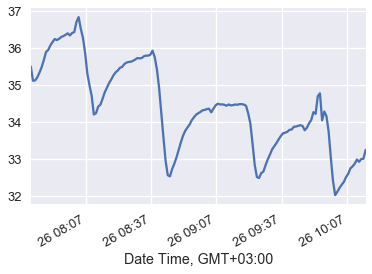

In [18]:
rh.plot()

In [15]:
means

{'rh': 34.402025806451604, 'temp': 30.05136774193548}